# Question 1

In [5]:
#loading the dataset 
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}

import pandas as pd
import numpy as np

df = pd.DataFrame(data)
dataframe = pd.DataFrame()
dataframe['total_purchase'] = df.groupby('Customer_ID')['Purchase_Amount'].sum()
dataframe


,total_purchase
Customer_ID,
101,520
102,600
103,480
104,300
105,400


In [9]:
dataframe1= dataframe['total_purchase'].sort_values(ascending=False)

In [11]:
dataframe1.head(3)

Customer_ID
102    600
101    520
103    480
Name: total_purchase, dtype: int64

# Question 2

In [25]:

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

In [26]:
df = pd.DataFrame(data)
df

,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


In [27]:
# 1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).

Q1 = np.percentile(df['Sales'], 25)
Q3 = np.percentile(df['Sales'], 75)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
# 2. Determine the IQR (Interquartile Range).
print("IQR:", IQR)

# 3. Identify the lower and upper bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# 4. List the outliers in the dataset based on these bounds.
outliers = [x for x in df['Sales'] if x < lower_bound or x > upper_bound]
print("Outlier Values:", outliers)
print("Outliers row:", df[df['Sales'].isin(outliers)])

# replace the outliers with the median of the non-outlier data points.
# find median of non-outlier data points and then substitute in outliers
non_outliers = [x for x in df['Sales'] if x >= lower_bound and x <= upper_bound]
median = np.median(non_outliers)
print("Median of non-outliers:", median)
df['Sales'] = df['Sales'].apply(lambda x: median if x in outliers else x)

Q1: 31.5
Q3: 83.75
IQR: 52.25
Lower Bound: -46.875
Upper Bound: 162.125
Outlier Values: [200]
Outliers row:     Day  Sales
29   30    200
Median of non-outliers: 42.0


In [18]:
df

,Day,Sales
0,1,25.0
1,2,30.0
2,3,28.0
3,4,45.0
4,5,55.0
5,6,60.0
6,7,22.0
7,8,80.0
8,9,95.0
9,10,120.0


In [28]:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}

In [30]:
from scipy import stats
from scipy.stats import ttest_ind
df = pd.DataFrame(data)
t,p =ttest_ind(
    df[df['Group'] == 'Treatment']['Blood_Pressure'],
    df[df['Group'] == 'Control']['Blood_Pressure'],)


In [35]:
print("T-statistic:", t)
print("P-value:", p)
if p < 0.05:
    print("Reject the null hypothesis: Significant difference between groups.") 
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

T-statistic: -11.870553692962726
P-value: 6.008066605173374e-10
Reject the null hypothesis: Significant difference between groups.


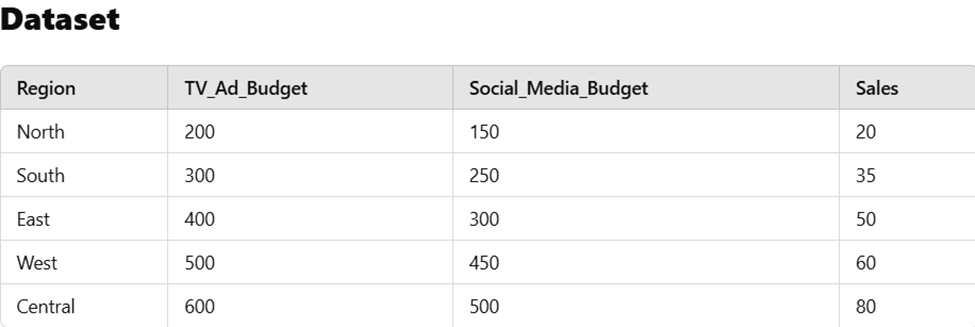

In [36]:
data =  {
    'Region' : ['North', 'South', 'East', 'West', 'Central'],
    'Tv_Ad_Budget': [200,300,400,500,600],
    'Social_Media_Ad_Budget': [150,250,300,450,500],
    'Sales': [20,35,50,60,80]
}

In [41]:
df = pd.DataFrame(data)

df.dtypes

Region                    object
Tv_Ad_Budget               int64
Social_Media_Ad_Budget     int64
Sales                      int64
dtype: object

In [42]:

def qualquan(df):
    qual = []
    quan = []
    for col in df.columns:
        if df[col].dtypes == 'object':
            qual.append(col)
        else:
            quan.append(col)
    return quan, qual
quan,qual = qualquan(df)

In [43]:
quan

['Tv_Ad_Budget', 'Social_Media_Ad_Budget', 'Sales']

In [44]:
qual

['Region']

In [45]:
df[quan].cov()

,Tv_Ad_Budget,Social_Media_Ad_Budget,Sales
Tv_Ad_Budget,25000.0,22500.0,3625.0
Social_Media_Ad_Budget,22500.0,20750.0,3225.0
Sales,3625.0,3225.0,530.0


In [46]:
df[quan].corr()

,Tv_Ad_Budget,Social_Media_Ad_Budget,Sales
Tv_Ad_Budget,1.000000,0.987878,0.995864
Social_Media_Ad_Budget,0.987878,1.000000,0.972485
Sales,0.995864,0.972485,1.000000
